# Salary Prediction using AI/ML
### By Krishna Soni

---
First we pre-process, clean and model the data to standarsise and structure it.


In [1]:
# Importing Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error , r2_score

In [2]:
data = pd.read_csv(r'salary_data.csv')
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [3]:
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [5]:
data.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [6]:
# Checking for null data
data.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [7]:
# Dropping null values from database
data.dropna(inplace=True)

In [8]:
data.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [9]:
# Checking unique value counts of Job Titles in the database

data['Job Title'].value_counts()

Job Title
Software Engineer                     518
Data Scientist                        453
Software Engineer Manager             376
Data Analyst                          363
Senior Project Engineer               318
                                     ... 
Junior Research Scientist               1
Senior Product Development Manager      1
Junior Social Media Specialist          1
Senior Software Architect               1
Social Media Man                        1
Name: count, Length: 191, dtype: int64

In [10]:
# Reducing Job titles by omitting titles with less than 25 counts

job_title_count = data['Job Title'].value_counts()
job_title_edited = job_title_count[job_title_count<=25]
job_title_edited.count()

np.int64(142)

In [11]:
data['Job Title'] = data['Job Title'].apply(lambda x: 'Others' if x in job_title_edited else x )
data['Job Title'].nunique()

50

In [12]:
data['Job Title'].value_counts()

Job Title
Software Engineer                   518
Data Scientist                      453
Others                              406
Software Engineer Manager           376
Data Analyst                        363
Senior Project Engineer             318
Product Manager                     313
Full Stack Engineer                 308
Marketing Manager                   255
Senior Software Engineer            244
Back end Developer                  244
Front end Developer                 241
Marketing Coordinator               158
Junior Sales Associate              142
Financial Manager                   134
Marketing Analyst                   132
Software Developer                  125
Operations Manager                  114
Human Resources Manager             104
Director of Marketing                88
Web Developer                        87
Research Director                    75
Product Designer                     75
Content Marketing Manager            73
Sales Associate               

In [13]:
#Checking unique value count of Education Level

data['Education Level'].value_counts()

Education Level
Bachelor's Degree    2265
Master's Degree      1572
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: count, dtype: int64

In [14]:
# Combining repeating values of education level

data['Education Level'].replace(["Bachelor's Degree","Master's Degree","phD"],["Bachelor's","Master's","PhD"],inplace=True)
data['Education Level'].value_counts()

Education Level
Bachelor's     3021
Master's       1860
PhD            1369
High School     448
Name: count, dtype: int64

In [15]:
# Checking Unique Value count of Gender

data['Gender'].value_counts()

Gender
Male      3671
Female    3013
Other       14
Name: count, dtype: int64

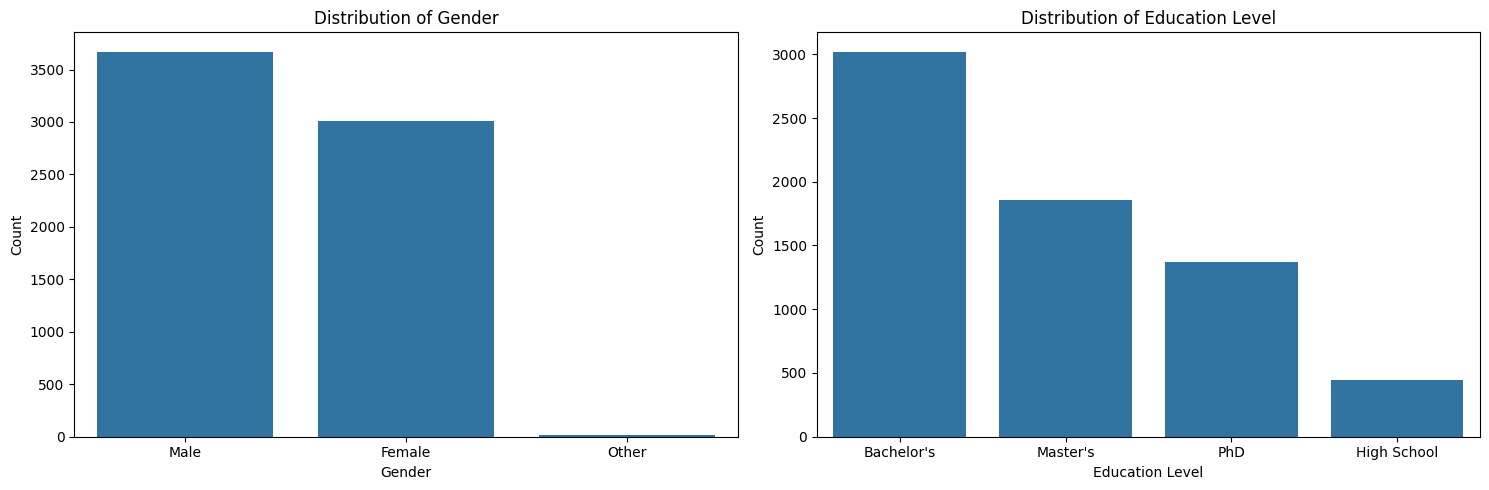

In [16]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot the count of data points for each gender category in the first subplot
sns.countplot(x='Gender', data=data, ax=ax[0])

# Plot the count of data points for each education level category in the second subplot
sns.countplot(x='Education Level', data=data, ax=ax[1])

# Add labels and titles for the subplots
ax[0].set_xlabel('Gender')
ax[0].set_ylabel('Count')
ax[0].set_title('Distribution of Gender')

ax[1].set_xlabel('Education Level')
ax[1].set_ylabel('Count')
ax[1].set_title('Distribution of Education Level')

# Show the plots
plt.tight_layout()
plt.show()

**Distribution of Gender and Education Level**

**1. Gender distribution(Left plot):** Most employees are Male, followed by Female. There are very few in the Other category.

**2. Education Level distribution (Right plot):** Most employees have a Bachelor’s degree, followed by Master’s, then PhD, and the fewest have only High School education.

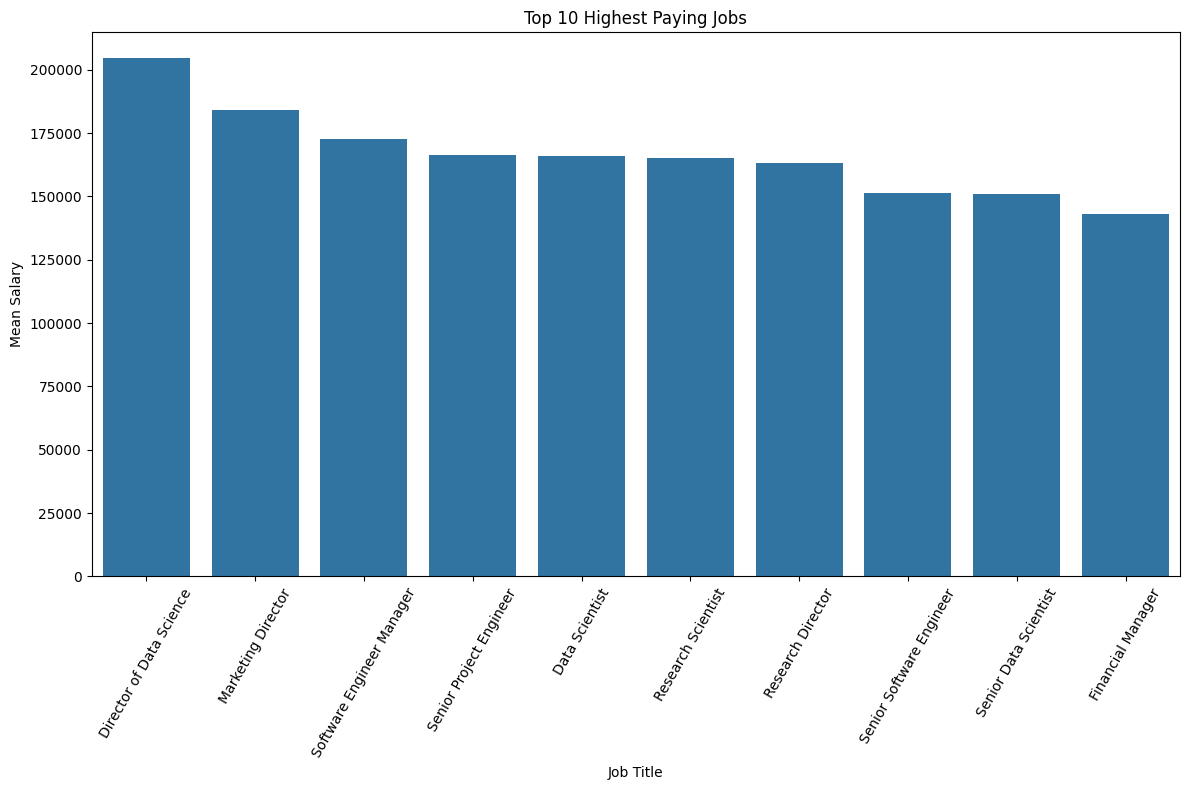

In [17]:
# Get the top 10 job titles with the highest mean salary
top_10_highest_paying_jobs = data.groupby('Job Title')['Salary'].mean().nlargest(10)

# Create a single bar plot for the top 10 highest paying job titles and their mean salaries
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_highest_paying_jobs.index, y=top_10_highest_paying_jobs.values)

# Customize the plot
plt.xlabel('Job Title')
plt.ylabel('Mean Salary')
plt.title('Top 10 Highest Paying Jobs')
plt.xticks(rotation=60)  # Rotate x-axis labels if needed

# Show the plot
plt.tight_layout()
plt.show()

**Top 10 Highest Paying Jobs**    

This bar plot shows the top 10 highest paying job titles, ranked by mean salary. Director of Data Science has the highest mean salary (over $200,000), followed by Marketing Director and Software Engineer Manager. In general, senior technical and leadership roles dominate the top-paying positions.


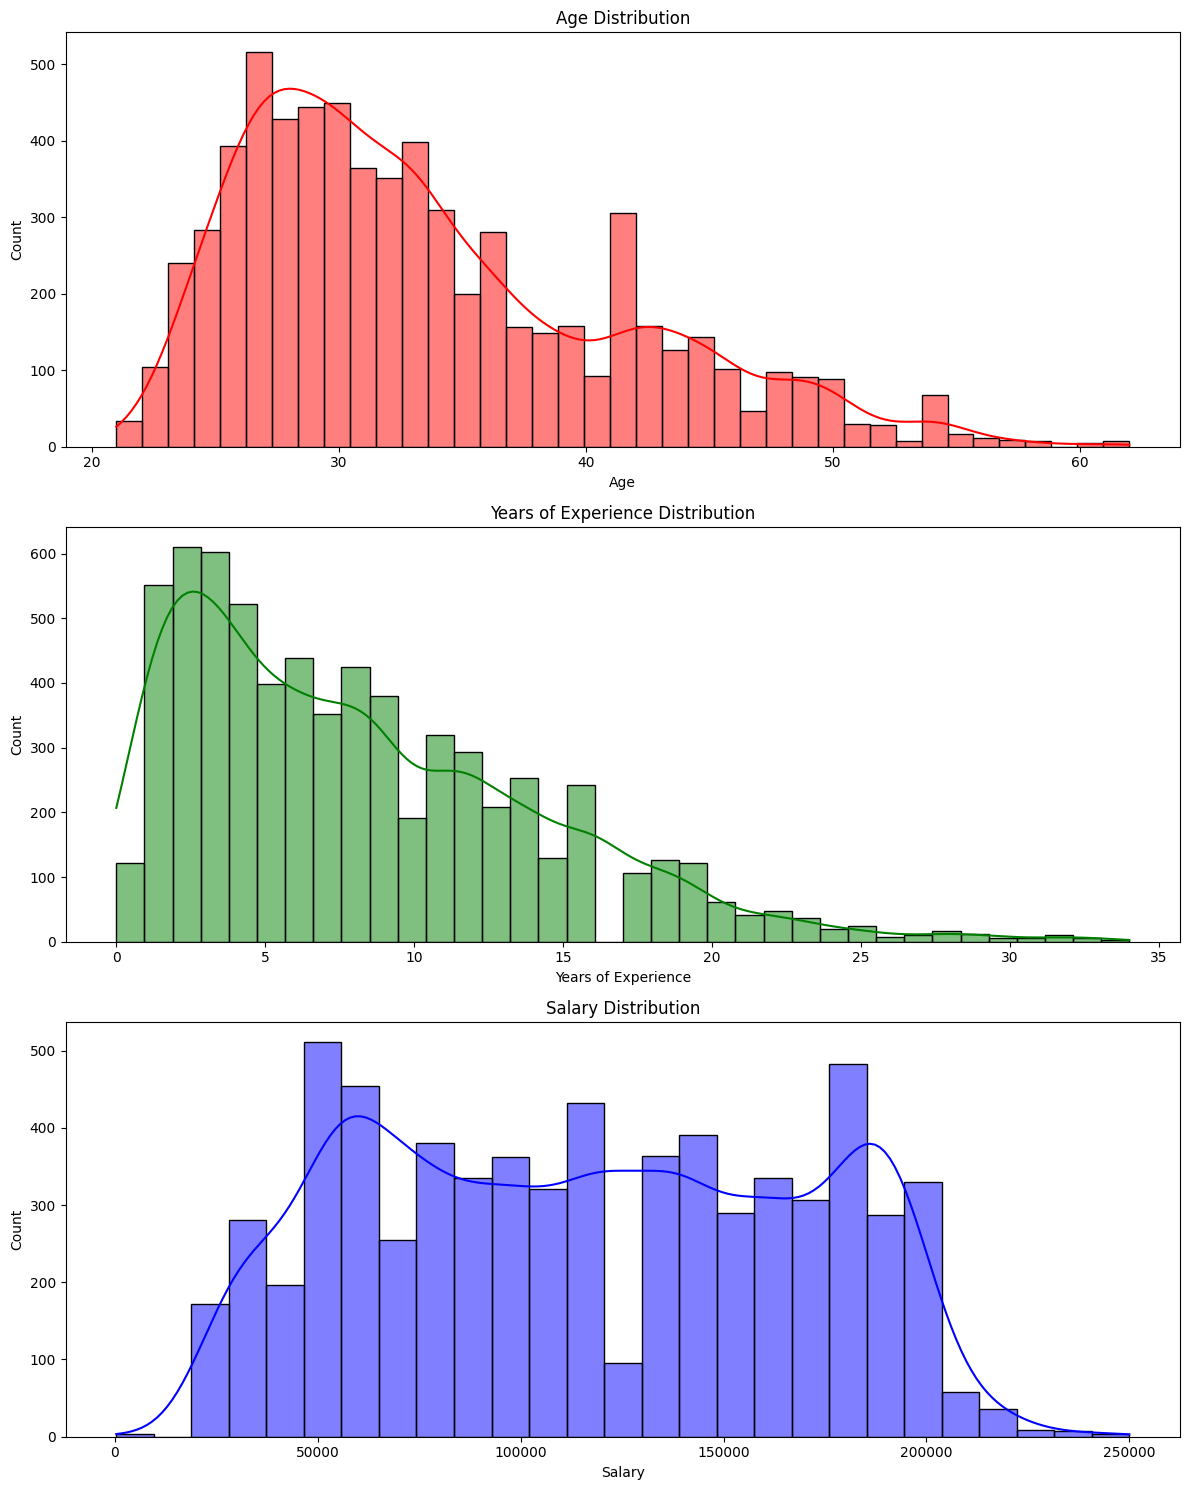

In [18]:
# Create a figure with three subplots
fig, ax = plt.subplots(3, 1, figsize=(12, 15))

# Create a histogram of Age in the first subplot
sns.histplot(data['Age'], ax=ax[0], color='red', kde=True)
ax[0].set_title('Age Distribution')
ax[0].set_xlabel('Age')

# Create a histogram of Years of Experience in the second subplot
sns.histplot(data['Years of Experience'], ax=ax[1], color='green', kde=True)
ax[1].set_title('Years of Experience Distribution')
ax[1].set_xlabel('Years of Experience')

# Create a histogram of Salary in the third subplot
sns.histplot(data['Salary'], ax=ax[2], color='blue', kde=True)
ax[2].set_title('Salary Distribution')
ax[2].set_xlabel('Salary')

plt.tight_layout()
plt.show()

## **Distribution of continuous variables**

1️⃣ **Age Distribution:**  
The plot shows that most of the workforce is concentrated between ages **27 and 31**, indicating a predominantly young employee base.

2️⃣ **Years of Experience Distribution:**  
Most employees have between **1 to 4 years of experience**, which aligns with the younger age distribution. This suggests that the workforce is largely early in their careers.

3️⃣ **Salary Distribution:**  
Salaries are widely spread, with many employees earning around **$50,000–$60,000**, while a comparable group earns up to **$180,000**. Overall, the majority of salaries fall below **$125,000**, highlighting a diverse pay structure across different roles and experience levels.


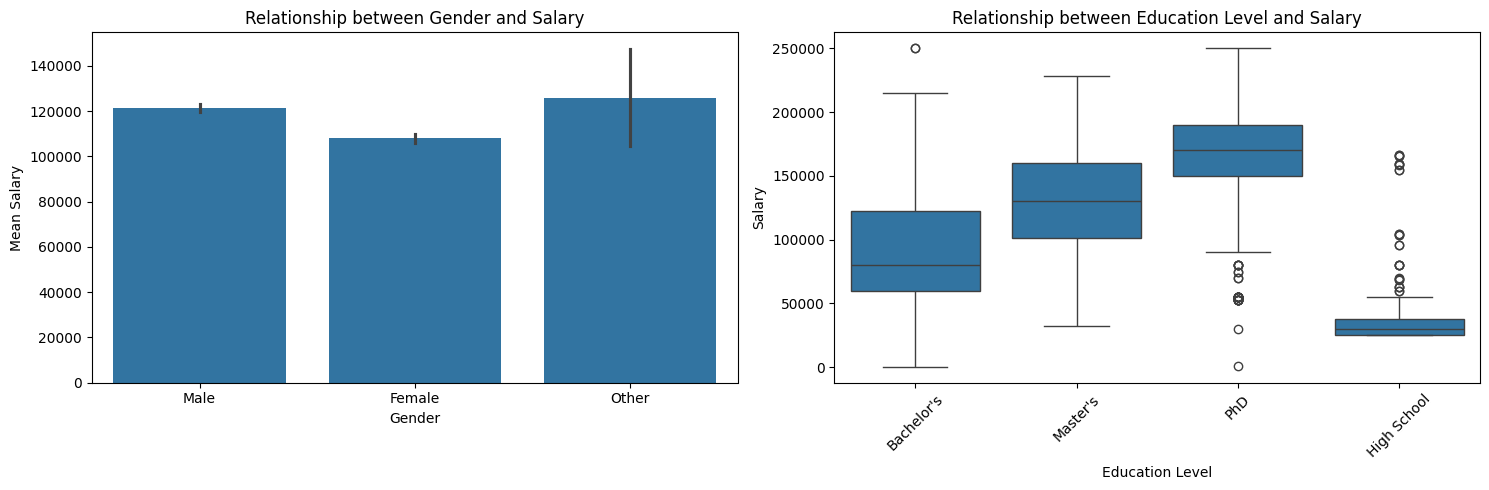

In [19]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Create a bar plot for the relationship between Gender and Salary in the first subplot
sns.barplot(x='Gender', y='Salary', data=data, ax=ax[0])
ax[0].set(title='Relationship between Gender and Salary', xlabel='Gender', ylabel='Mean Salary')

# Create a box plot for the relationship between Education Level and Salary in the second subplot
sns.boxplot(x='Education Level', y='Salary', data=data, ax=ax[1])
ax[1].set(title='Relationship between Education Level and Salary', xlabel='Education Level', ylabel='Salary')

# Rotate x-axis labels in the second subplot for better readability
ax[1].tick_params(axis='x', rotation=45)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


1️⃣ **Gender and Salary:**  
The chart shows that employees categorized as "Other" have the highest average salaries, followed by male employees. Female employees have the lowest mean salaries among the three groups.

2️⃣ **Education Level and Salary:**  
The box plot indicates a clear trend of increasing average salary with higher education levels. High school graduates have the lowest pay, while PhD holders receive the highest salaries on average. Interestingly, the salary spread is widest among employees with a bachelor’s degree, suggesting a large variation in earnings — some even comparable to those with advanced degrees.


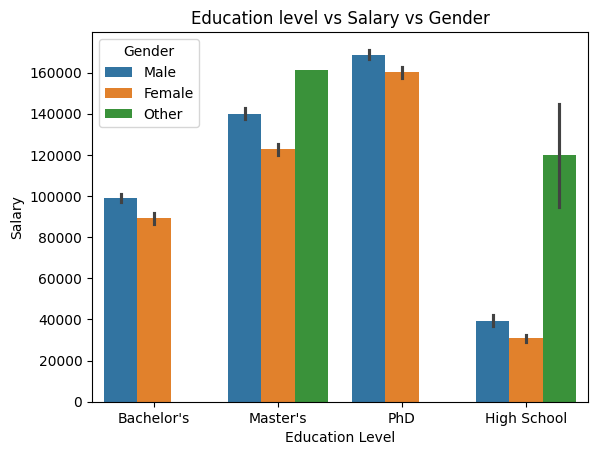

In [20]:

sns.barplot(x='Education Level',y='Salary',data=data,hue='Gender').set(title='Education level vs Salary vs Gender')
plt.show()

## **Education Level vs Salary by Gender**

This plot compares salaries across different education levels, further divided by gender.

- Among employees with a **Bachelor’s degree**, men earn slightly more on average than women.
- For **Master’s and PhD degrees**, male employees generally have higher average salaries, although the gap narrows at the PhD level.
- Interestingly, in the **High School** category, the "Other" gender group shows a much higher average salary compared to both men and women.
- Overall, higher education levels are associated with higher salaries across all genders, but the salary differences between genders persist at each education level.


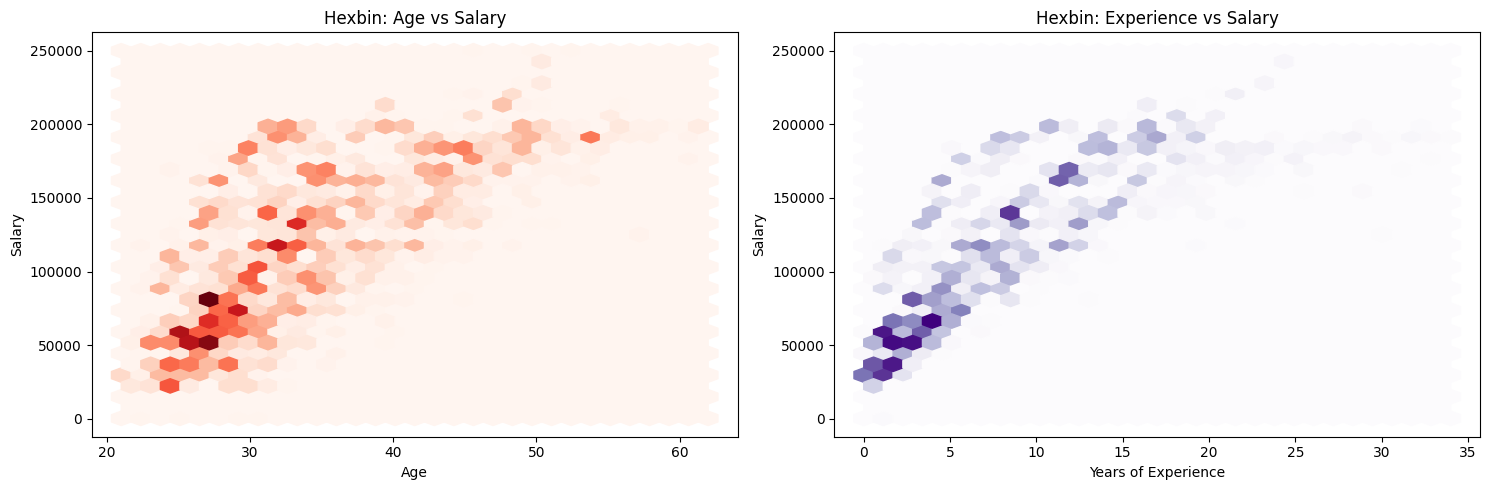

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Age vs Salary
ax[0].hexbin(data['Age'], data['Salary'], gridsize=30, cmap='Reds')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Salary')
ax[0].set_title('Hexbin: Age vs Salary')

# Experience vs Salary
ax[1].hexbin(data['Years of Experience'], data['Salary'], gridsize=30, cmap='Purples')
ax[1].set_xlabel('Years of Experience')
ax[1].set_ylabel('Salary')
ax[1].set_title('Hexbin: Experience vs Salary')

plt.tight_layout()
plt.show()


### **Relationship between continuous variables (Hexbin plots)**

1️⃣ **Age vs Salary:**  
The hexbin plot shows that most employees are clustered between ages **25 and 35**, earning salaries mainly between **$50,000 and $150,000**. There is a general trend suggesting that salary tends to increase with age, but most high-density regions are still concentrated in younger age groups.

2️⃣ **Years of Experience vs Salary:**  
This plot highlights a clear upward trend: as experience increases, salary generally rises. Most employees with **5 to 15 years of experience** earn between **$50,000 and $175,000**, with the highest concentration around 5–10 years of experience.

Overall, both plots emphasize that while salary tends to grow with age and experience, the largest share of employees are still at lower experience and age levels with moderate s


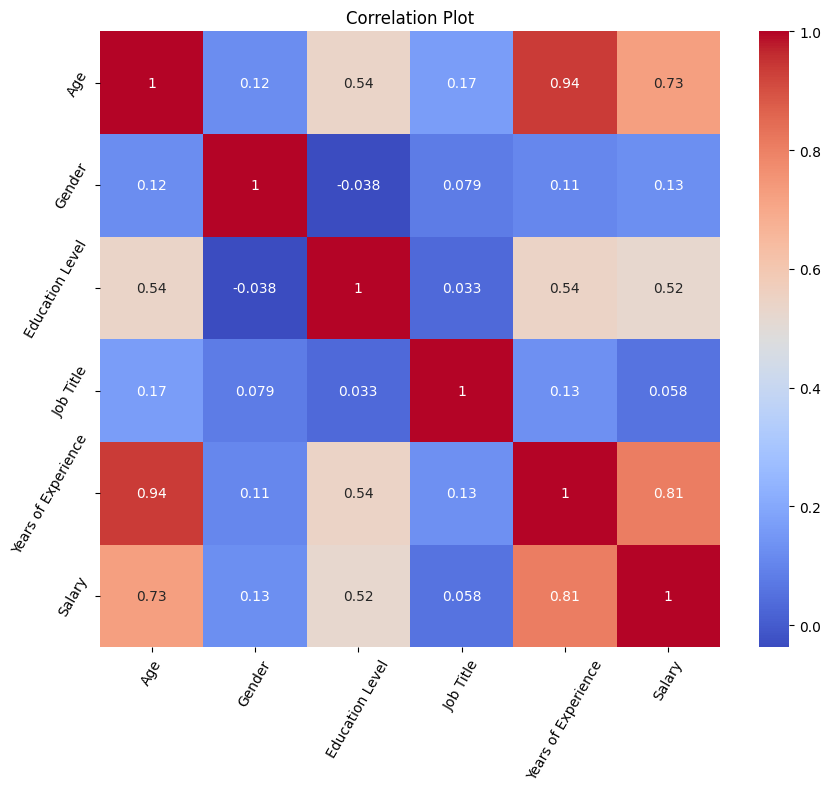

In [22]:

nData = data
# Label encoding the categorical variable
le = LabelEncoder()
nData['Gender'] = le.fit_transform(data['Gender'])
nData['Education Level'] = le.fit_transform(data['Education Level'])
nData['Job Title'] = le.fit_transform(data['Job Title'])


# Correlation plot
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(nData.corr(), annot=True, cmap='coolwarm')  # Use cmap for color map
plt.title('Correlation Plot')
plt.xticks(rotation=60) 
plt.yticks(rotation=60) 
plt.show()

In [23]:
data['Job Title'] = le.fit_transform(data['Job Title'])
data['Gender'] = le.fit_transform(data['Gender'])
data['Education Level'] = le.fit_transform(data['Education Level'])

### Encoding Categorical Variables

Machine learning models work with numerical data. We convert categorical columns (Job Title, Gender, Education Level) into numeric format using Label Encoding.


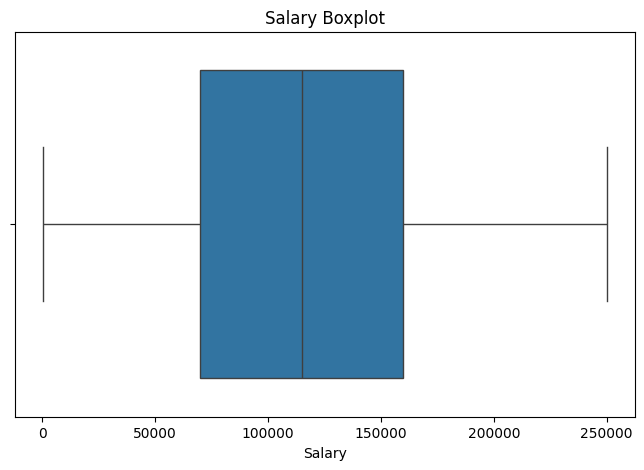

Data shape after removing salary outliers: (6698, 6)


In [24]:
# Boxplot to visualize salary distribution
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['Salary'])
plt.title("Salary Boxplot")
plt.show()

# Calculate IQR
Q1 = data['Salary'].quantile(0.25)
Q3 = data['Salary'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
data = data[(data['Salary'] >= lower_bound) & (data['Salary'] <= upper_bound)]

print("Data shape after removing salary outliers:", data.shape)


In [25]:
X = data.drop('Salary', axis=1)
y = data['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Train-Test Split

We split the dataset into training and testing sets to evaluate our models on unseen data. We use 80% of the data for training and 20% for testing.


In [26]:
# Create a dictionary for defining models and tuning hyperparameters

model_params = {
    'Linear_Regression':{
        'model':LinearRegression(),
        'params':{
            
        }
    },
    'Decision_Tree':{
        'model':DecisionTreeRegressor(),
        'params':{
            'max_depth':[2,4,6,8,10],
            'random_state':[0,42],
            'min_samples_split':[1,5,10,20]
        }
    },
    'Random_Forest':{
        'model':RandomForestRegressor(),
        'params':{
            'n_estimators':[10,30,20,50,80]
        }
    }
}

In [27]:

# Hyper parameter tuning through grid search cv
score=[]

for model_name,m in model_params.items():
    clf = GridSearchCV(m['model'],m['params'],cv=5,scoring='neg_mean_squared_error')
    clf.fit(X_train,y_train)
    
    score.append({
        'Model':model_name,
        'Params':clf.best_params_,
        'MSE(-ve)':clf.best_score_
    })
pd.DataFrame(score)    

,Model,Params,MSE(-ve)
0,Linear_Regression,{},-8.940945e+08
1,Decision_Tree,"{'max_depth': 10, 'min_samples_split': 5, 'ran...",-1.111116e+08
2,Random_Forest,{'n_estimators': 50},-6.840877e+07


In [28]:
# Order of the best models 

s = pd.DataFrame(score)
sort = s.sort_values(by = 'MSE(-ve)',ascending=False)
sort

,Model,Params,MSE(-ve)
2,Random_Forest,{'n_estimators': 50},-6.840877e+07
1,Decision_Tree,"{'max_depth': 10, 'min_samples_split': 5, 'ran...",-1.111116e+08
0,Linear_Regression,{},-8.940945e+08


In [29]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


### Model Training

We train three different regression models:

- Linear Regression
- Decision Tree Regressor
- Random Forest Regressor

This helps us compare their performance on the same data.


Linear Regression:
MSE: 898034233.88
MAE: 23570.21
R² Score: 0.69

Decision Tree:
MSE: 114075316.53
MAE: 3484.53
R² Score: 0.96

Random Forest:
MSE: 79028615.90
MAE: 3399.50
R² Score: 0.97



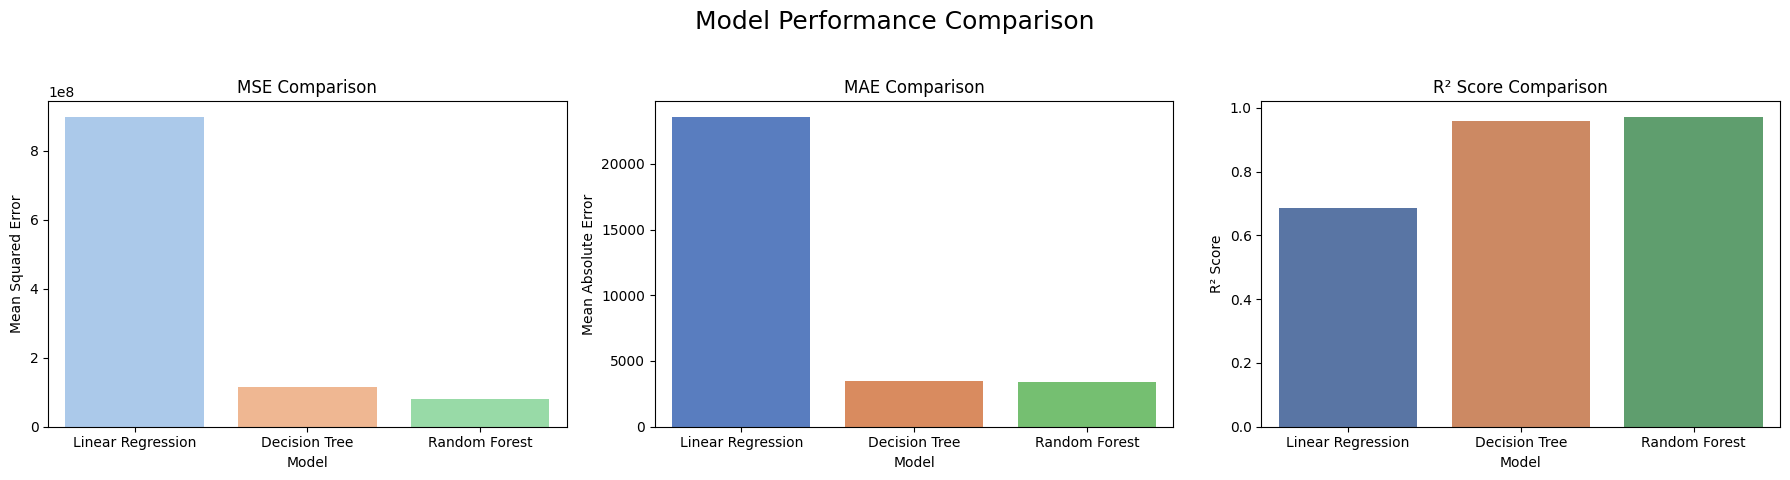

In [30]:
# List to store model performance metrics
model_performance = []

# Evaluation function that also stores results
def evaluate_and_store(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    model_performance.append({
        'Model': model_name,
        'MSE': mse,
        'MAE': mae,
        'R2': r2
    })
    print(f"{model_name}:\nMSE: {mse:.2f}\nMAE: {mae:.2f}\nR² Score: {r2:.2f}\n")

# Evaluate your models
evaluate_and_store(y_test, lr_pred, "Linear Regression")
evaluate_and_store(y_test, dt_pred, "Decision Tree")
evaluate_and_store(y_test, rf_pred, "Random Forest")

# Convert to DataFrame
performance_df = pd.DataFrame(model_performance)

# Plotting the metrics comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(x='Model', y='MSE', data=performance_df, ax=axes[0], palette="pastel")
axes[0].set_title('MSE Comparison')
axes[0].set_ylabel('Mean Squared Error')

sns.barplot(x='Model', y='MAE', data=performance_df, ax=axes[1], palette="muted")
axes[1].set_title('MAE Comparison')
axes[1].set_ylabel('Mean Absolute Error')

sns.barplot(x='Model', y='R2', data=performance_df, ax=axes[2], palette="deep")
axes[2].set_title('R² Score Comparison')
axes[2].set_ylabel('R² Score')

plt.suptitle('Model Performance Comparison', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Model Evaluation

We evaluate each model using the following metrics:

- **Mean Squared Error (MSE):** Measures average squared differences between actual and predicted values. Lower is better.
- **Mean Absolute Error (MAE):** Measures average absolute differences. Lower is better.
- **R² Score:** Represents how well the model explains the variability of the target variable. Closer to 1 is better.

These metrics help us decide which model performs the best.


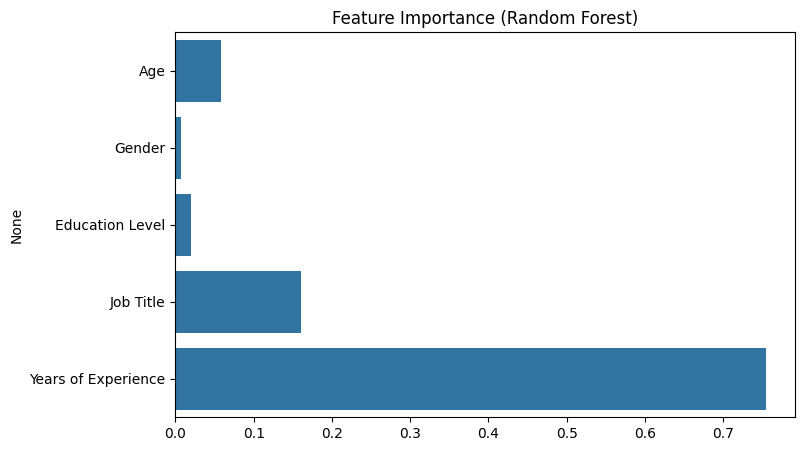

In [31]:
importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance (Random Forest)")
plt.show()


In [32]:
import joblib
joblib.dump(rf, "salaryPredictionRf.pkl")

['salaryPredictionRf.pkl']

### Feature Importance

For tree-based models like Random Forest, we can plot feature importance to see which features have the most influence on the predicted salary.


## 📌 Conclusion

In this project, we successfully built a machine learning pipeline to predict salaries based on demographic and professional features such as **Age**, **Gender**, **Education Level**, **Job Title**, and **Years of Experience**. 

We performed comprehensive data preprocessing, handled missing values, encoded categorical variables, and split the data for model training and evaluation. Multiple regression models — including **Linear Regression**, **Decision Tree Regressor**, and **Random Forest Regressor** — were trained and assessed using metrics like **R-squared (R²)**, **Mean Absolute Error (MAE)**, and **Mean Squared Error (MSE)**.

### Key Highlights:
- **Random Forest Regressor** provided the most accurate results among all models, likely due to its ensemble approach and ability to capture complex data patterns.
- **Hyperparameter tuning using GridSearchCV** was employed to optimize model parameters, further improving prediction accuracy and reducing error rates.
- Data visualization played a crucial role in uncovering insights about salary distribution, experience trends, and the influence of job titles and education on compensation.

---

This project demonstrates the practical application of AI/ML in salary prediction and highlights how data-driven insights can support decision-making in HR, recruitment, and compensation management.
